- **Introduction to Decision Tree Classification**: This notebook explores the application of decision tree classifiers using scikit-learn
- **Addressing Low Accuracy**: low accuracy rate of 40%
- **Criterion Selection**: The decision tree classifier in this notebook uses the entropy criterion for information gain calculation. Entropy was chosen due to its effectiveness in splitting the dataset into subsets that are as pure as possible in terms of class labels.
- **Training and Test Split**: The dataset is divided into a training set comprising 70% of the data and a test set comprising the remaining 30%

In [130]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [131]:
# Load dataset
data = pd.read_csv("dataTree.csv")
data

,Outlook,Temperature,Humidity,Windy,Play
0,Sunny,Hot,High,False,No
1,Sunny,Hot,High,True,No
2,Overcast,Hot,High,False,Yes
3,Rainy,Mild,High,False,Yes
4,Rainy,Cool,Normal,False,Yes
5,Rainy,Cool,Normal,True,No
6,Overcast,Cool,Normal,True,Yes
7,Sunny,Mild,High,False,No
8,Sunny,Cool,Normal,False,Yes
9,Rainy,Mild,Normal,False,Yes


In [132]:
# Split dataset into features and target variable
feature_cols = ['Outlook', 'Temperature', 'Humidity', 'Windy']
# One-hot encode categorical features
X = pd.get_dummies(data[feature_cols])  # Convert categorical variables to numerical
print(X)
y = pd.get_dummies(data['Play'])

    Windy  Outlook_Overcast  Outlook_Rainy  Outlook_Sunny  Temperature_Cool  \
0   False             False          False           True             False   
1    True             False          False           True             False   
2   False              True          False          False             False   
3   False             False           True          False             False   
4   False             False           True          False              True   
5    True             False           True          False              True   
6    True              True          False          False              True   
7   False             False          False           True             False   
8   False             False          False           True              True   
9   False             False           True          False             False   
10   True             False          False           True             False   
11   True              True          False          

In [133]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [134]:
# Create Decision Tree classifier object
clf = DecisionTreeClassifier(criterion='entropy',max_depth=2)

# Train Decision Tree Classifier
clf = clf.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test)

In [135]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.4


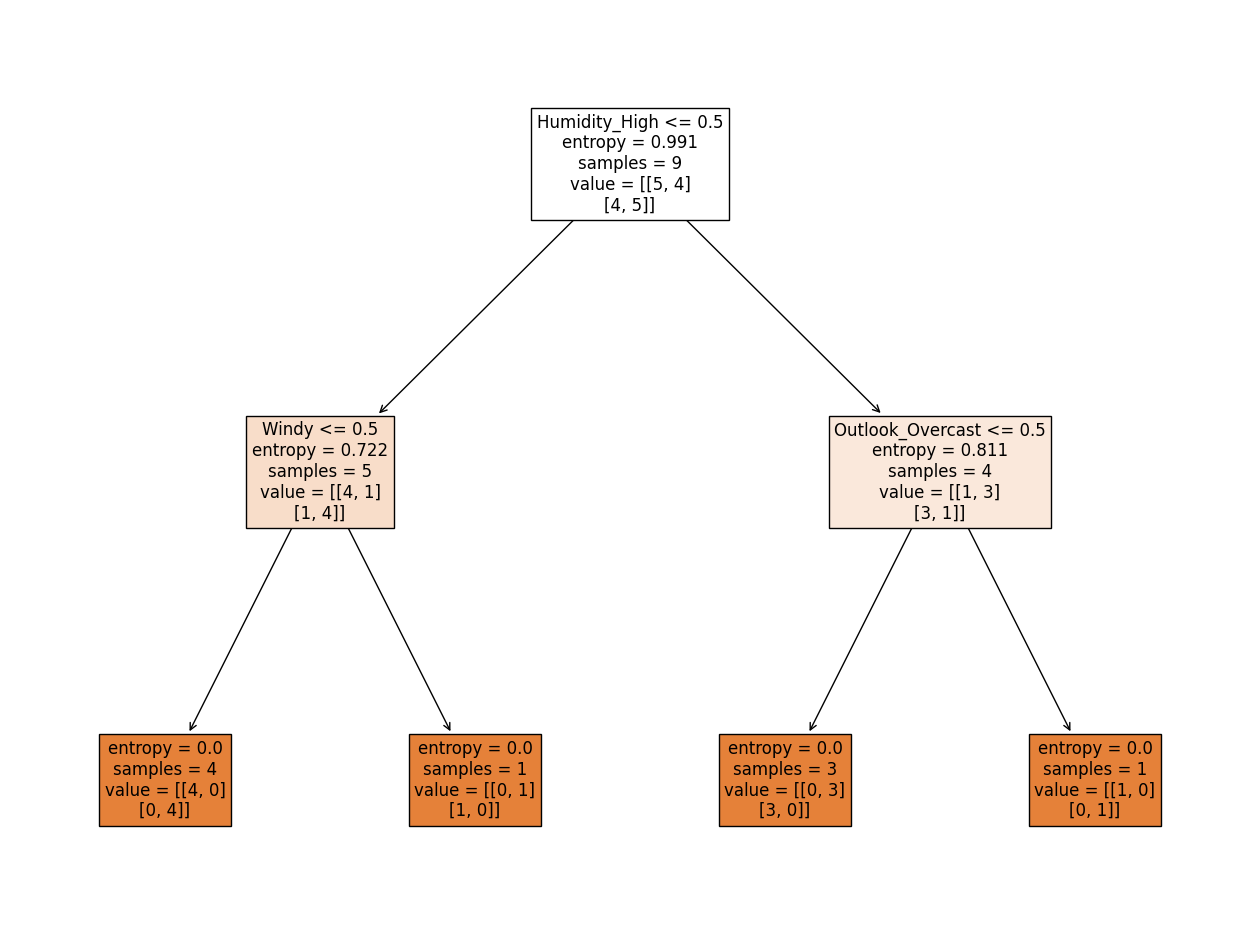

In [136]:
import matplotlib.pyplot as plt

# Plot the decision tree
fig = plt.figure(figsize=(16, 12))
plot_tree(clf, feature_names=X.columns, class_names=['Not_Play', 'Play'], filled=True, fontsize=12)
plt.show()

In [137]:
# Calculate probabilities for each Outlook condition
outlook_probabilities = data.groupby('Outlook')['Play'].apply(lambda x: (x == 'Yes').mean()).reset_index()
outlook_probabilities.columns = ['Outlook', 'Probability_Play_Yes']

print(outlook_probabilities)


    Outlook  Probability_Play_Yes
0  Overcast                   1.0
1     Rainy                   0.6
2     Sunny                   0.4


In [138]:
# Calculate probabilities for each Temperature condition
temperature_probabilities = data.groupby('Temperature')['Play'].apply(lambda x: (x == 'Yes').mean()).reset_index()
temperature_probabilities.columns = ['Temperature', 'Probability_Play_Yes']

print(temperature_probabilities)

  Temperature  Probability_Play_Yes
0        Cool              0.750000
1         Hot              0.500000
2        Mild              0.666667


In [139]:
# Calculate probabilities for each Humidity condition
humidity_probabilities = data.groupby('Humidity')['Play'].apply(lambda x: (x == 'Yes').mean()).reset_index()
humidity_probabilities.columns = ['Humidity', 'Probability_Play_Yes']

print(humidity_probabilities)

  Humidity  Probability_Play_Yes
0     High              0.428571
1   Normal              0.857143


In [140]:
# Calculate probabilities for each Windy condition
windy_probabilities = data.groupby('Windy')['Play'].apply(lambda x: (x == 'Yes').mean()).reset_index()
windy_probabilities.columns = ['Windy', 'Probability_Play_Yes']

print(windy_probabilities)

   Windy  Probability_Play_Yes
0  False                  0.75
1   True                  0.50


**Conclusion:**

 - this model has a very low accuracy of 40% 
 - I also feel like the question is posed ambiguously, constructing a general-purpose decision tree can mean a lot of things, so i decided to work with sci kit learn 
